# Spam Emails Attack Detection using Network Flow Data with Decision Tree Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv("2-Neris-20110811.binetflow.csv")     # Spam Emails Attack

In [ ]:
df2.shape

(1808122, 15)

In [ ]:
df2.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/11 09:53:40.240135,9.016532,tcp,31.96.153.11,60257,->,147.32.84.229,443,SRA_SA,0.0,0.0,7,508,208,flow=Background-TCP-Established
1,2011/08/11 09:55:01.054702,2.903761,tcp,83.228.37.92,2571,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
2,2011/08/11 09:55:02.677188,3.032142,tcp,83.228.37.92,2574,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
3,2011/08/11 09:55:04.307051,2.932428,tcp,83.228.37.92,2576,->,147.32.84.229,80,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
4,2011/08/11 09:55:03.958463,6.017523,tcp,83.228.37.92,2571,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established


### Data Preprocessing

In [ ]:
df2 = df2.drop('Dir', axis =1)

In [ ]:
df2.dropna(inplace=True)

In [ ]:
nRow, nCol = df2.shape
print(f'This Dataset has {nRow} rows and {nCol} columns')

This Dataset has 1534307 rows and 14 columns


In [ ]:
for i, col in enumerate(df2.columns):
    print(i, col)

0 StartTime
1 Dur
2 Proto
3 SrcAddr
4 Sport
5 DstAddr
6 Dport
7 State
8 sTos
9 dTos
10 TotPkts
11 TotBytes
12 SrcBytes
13 Label


In [ ]:
df2.dtypes

StartTime     object
Dur          float64
Proto         object
SrcAddr       object
Sport         object
DstAddr       object
Dport         object
State         object
sTos         float64
dTos         float64
TotPkts        int64
TotBytes       int64
SrcBytes       int64
Label         object
dtype: object

In [ ]:
df2['Label'].value_counts()

flow=To-Background-UDP-CVUT-DNS-Server                                     660165
flow=Background-UDP-Established                                            602264
flow=Background-TCP-Established                                            140154
flow=Background-Established-cmpgw-CVUT                                      78066
flow=To-Background-CVUT-Proxy                                               12929
                                                                            ...  
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-7         1
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-60                                 1
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-5         1
flow=From-Botnet-V43-TCP-HTTP-Not-Encrypted-Down-2                              1
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-23                                 1
Name: Label, Length: 128, dtype: int64

In [ ]:
# Create a new column and initialize with 'Benign'
df2['Attack_Label'] = 'Benign'


In [ ]:
df2.loc[df2["Label"].str.contains("botnet", case=False), "Attack_Label"] = "Spam Emails Attack"

In [ ]:
df2[df2['Label'].str.contains("botnet", case=False)]

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Attack_Label
52,2011/08/11 10:39:42.414864,130.427841,tcp,147.32.84.165,1372,193.23.181.44,80,FSRPA_FSPA,0.0,0.0,10,1020,574,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
53,2011/08/11 10:39:42.415145,130.727692,tcp,147.32.84.165,1378,72.20.15.61,80,FSPA_SRA,0.0,0.0,8,629,447,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
54,2011/08/11 10:39:42.415427,130.836685,tcp,147.32.84.165,1384,174.128.246.102,80,FSPA_SRA,0.0,0.0,8,629,507,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
55,2011/08/11 10:39:42.461329,135.338409,tcp,147.32.84.165,1403,193.23.181.44,179,FSPA_FSRA,0.0,0.0,10,756,456,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
56,2011/08/11 10:39:42.555397,138.770096,tcp,147.32.84.165,1424,193.23.181.44,179,FSPA_FSRA,0.0,0.0,10,756,456,flow=From-Botnet-V43-TCP-HTTP-Persistent-Down-1,Spam Emails Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780005,2011/08/11 13:55:27.552922,0.087055,tcp,147.32.84.165,4497,173.241.240.4,80,FSPA_FSPA,0.0,0.0,9,2195,1165,flow=From-Botnet-V43-TCP-Established-HTTP-Ad-43,Spam Emails Attack
1780008,2011/08/11 13:55:27.569169,7.209881,tcp,147.32.84.165,4503,92.240.244.181,80,SRPA_FSPA,0.0,0.0,10,1760,1366,flow=From-Botnet-V43-TCP-Established-HTTP-Ad-39,Spam Emails Attack
1780010,2011/08/11 13:55:27.577787,0.188852,tcp,147.32.84.165,4084,217.163.21.39,80,FSPA_FSPA,0.0,0.0,14,6141,810,flow=From-Botnet-V43-TCP-WEB-Established,Spam Emails Attack
1780035,2011/08/11 13:55:28.000203,0.139268,tcp,147.32.84.165,4383,217.163.21.39,80,FSPA_FSPA,0.0,0.0,10,1451,701,flow=From-Botnet-V43-TCP-WEB-Established,Spam Emails Attack


In [ ]:
# Drop the original 'Label' column and rename the new column to 'Label'
df2.drop('Label', axis=1, inplace=True)
df2.rename(columns={'Attack_Label': 'Label'}, inplace=True)

In [ ]:
df2['Label'].value_counts()

Benign                1526612
Spam Emails Attack       7695
Name: Label, dtype: int64

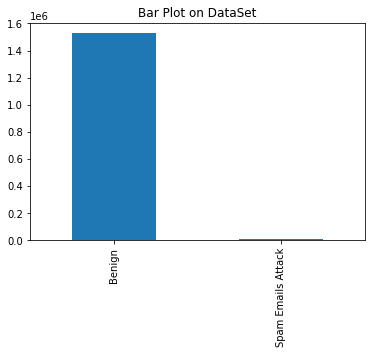

In [ ]:
# statistical counts of genuine flow and spam emails flow
counts = df2['Label'].value_counts()
counts.plot(kind = 'bar')
plt.title('Bar Plot on DataSet')
plt.show()

In [ ]:
df2.sample(n=20)

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
1654262,2011/08/11 13:31:01.318740,0.000238,udp,147.32.84.138,47798,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign
428876,2011/08/11 10:38:06.992039,0.001404,udp,77.85.241.66,46536,147.32.84.229,13363,CON,0.0,0.0,2,134,74,Benign
1484291,2011/08/11 12:58:13.404480,138.752625,tcp,147.32.84.181,52974,194.79.52.199,80,FSRPA_SPA,0.0,0.0,24,13341,3871,Benign
56562,2011/08/11 09:54:48.085244,0.000314,udp,147.32.85.25,43055,147.32.80.9,53,CON,0.0,0.0,2,208,79,Benign
1229258,2011/08/11 12:17:08.527711,0.001130,udp,86.136.255.127,81,147.32.84.229,13363,CON,0.0,0.0,2,545,75,Benign
1311754,2011/08/11 12:28:40.742998,1807.221313,udp,203.140.243.109,50473,147.32.84.229,13363,CON,0.0,0.0,5,360,300,Benign
761022,2011/08/11 11:19:18.357200,0.000215,udp,147.32.84.138,40792,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign
651085,2011/08/11 11:05:59.413941,0.000378,udp,147.32.84.138,33832,147.32.80.9,53,CON,0.0,0.0,2,214,81,Benign
1731236,2011/08/11 13:45:51.002848,0.000504,udp,147.32.84.189,56808,147.32.80.9,53,CON,0.0,0.0,2,208,79,Benign
956032,2011/08/11 11:43:50.466349,0.030660,udp,147.32.86.165,59069,147.32.80.9,53,CON,0.0,0.0,2,164,82,Benign


Feature Scaling

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df2.select_dtypes(include=['float64','int64']).columns
sc_df = scaler.fit_transform(df2.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_df = pd.DataFrame(sc_df, columns = cols)

In [ ]:
categorical_cols = df2.select_dtypes(include='O').keys()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Loop through each categorical column and apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))

### Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 70:30 ratio
train_X, test_X, train_Y, test_Y = train_test_split(df2.drop('Label', axis=1), df2['Label'], test_size=0.3, random_state=42)


In [ ]:
train_X.shape

(1074014, 13)

In [ ]:
train_X.head()

,StartTime,Dur,Proto,SrcAddr,Sport,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes
74709,69174,0.000194,4,55081,45432,12034,26052,7,0.0,0.0,2,216,83
66436,61294,0.010223,4,55275,50180,12030,26052,7,0.0,0.0,2,371,74
1068120,996464,0.000188,4,55081,36887,12034,26052,7,0.0,0.0,2,304,83
144302,135350,0.000254,4,55081,25538,12034,26052,7,0.0,0.0,2,216,83
383747,364155,0.001090,4,193335,52259,12115,2369,7,0.0,0.0,2,758,76


In [ ]:
train_Y.head()

74709      0
66436      0
1068120    0
144302     0
383747     0
Name: Label, dtype: int64

### Model Training and Prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()   
model.fit(train_X, train_Y)

DecisionTreeClassifier()

In [ ]:
y_preds = model.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

Text(33.0, 0.5, 'Predicted labels')

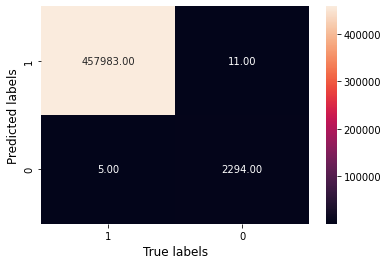

In [ ]:
cm_dt = confusion_matrix(test_Y, y_preds)
sn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

In [ ]:
print("Detection Accuracy: ", accuracy_score(test_Y, y_preds)*100,"%")

Detection Accuracy:  99.9965239532211 %


### Export Model

In [ ]:
import pickle

pickle.dump(model, open("NF-2-Spam-Emails-Attack.pkl", "wb"))